## Converting coordinate data to distances with R
---

Location,Date,Destination_Longitude,Destination_Latitude,Hive_Latitude,Hive_Longitude,Distance_Km,Distance_2_km
ROT,2017-04-19,51.82451,-0.3767893,-0.3773148,51.81005,1.60904539,1.6106937
ROT,2017-04-19,51.80914,-0.3797677,-0.3773148,51.81005,0.29082397,0.2895270
ROT,2017-04-19,51.80755,-0.3819628,-0.3773148,51.81005,0.58681459,0.5844577
ROT,2017-04-19,51.81016,-0.3770559,-0.3773148,51.81005,0.03119958,0.0311365
ROT,2017-04-19,51.80694,-0.3564140,-0.3773148,51.81005,2.34971998,2.3368777
ROT,2017-04-19,51.81133,-0.3796975,-0.3773148,51.81005,0.30058220,0.2995267


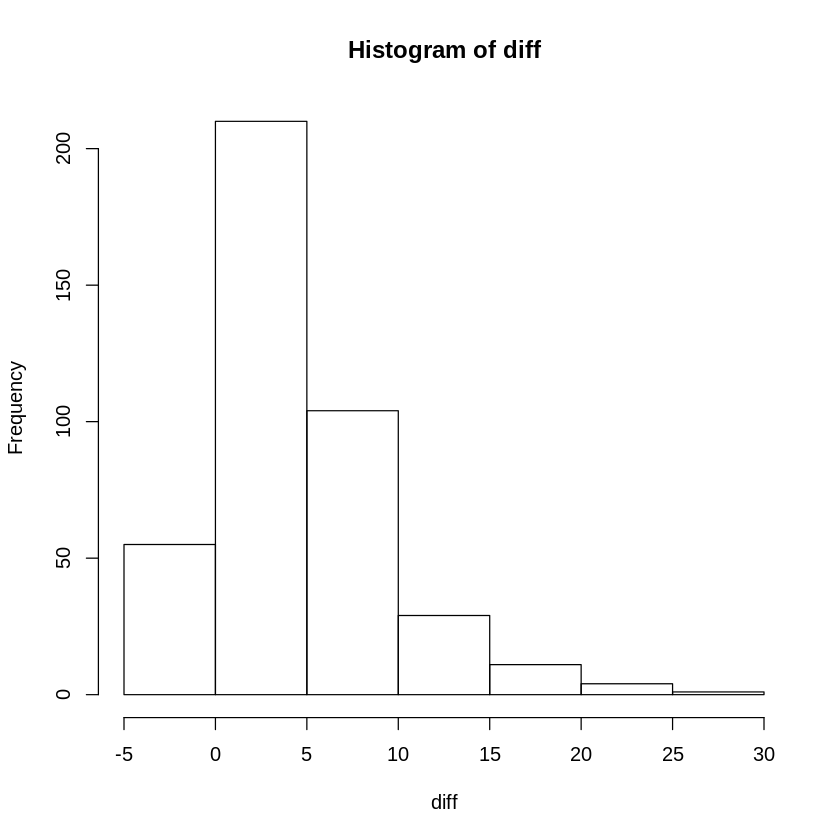

In [46]:
library(geosphere)
# load in coordinate data
path = "../Data/Distances.csv"
df = read.csv(path)

caldist <- function(x){
    hlong = as.numeric(x[6])
    hlat = as.numeric(x[5])
    dlong = as.numeric(x[3])
    dlat = as.numeric(x[4])
    dist_m = distVincentyEllipsoid(c(hlong, hlat), c(dlong, dlat))
    dist_km = dist_m / 1000
    return(dist_km)
}

df$Distance_2_km = apply(df, 1, caldist)
head(df)

diff = df$Distance_Km * 1000 - df$Distance_2_km *1000
hist(diff)

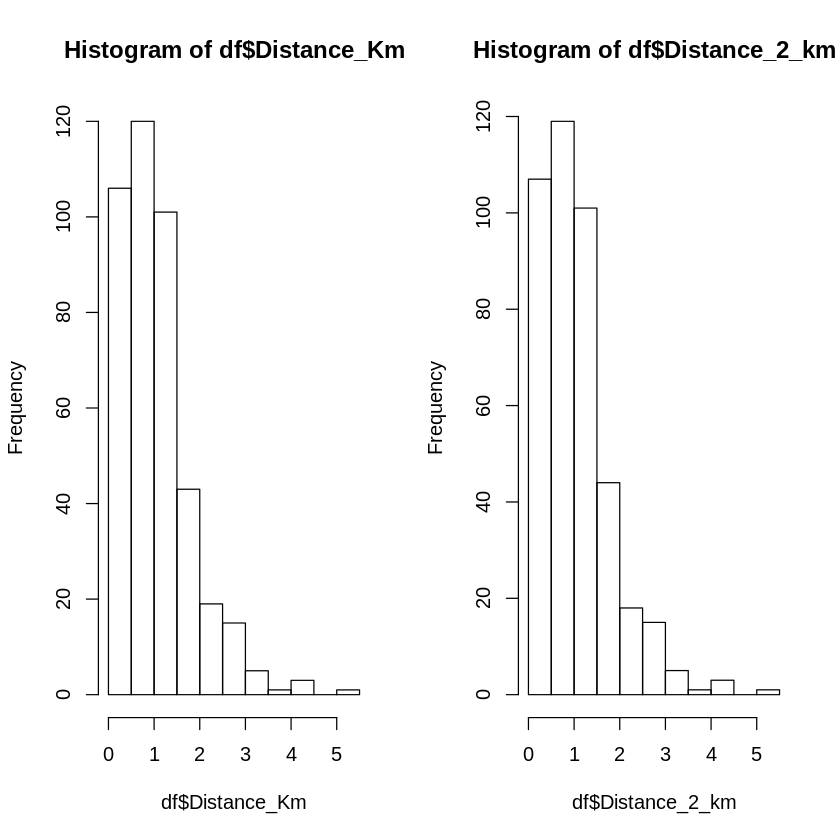

In [47]:
par(mfrow=c(1, 2))
hist(df$Distance_Km)
hist(df$Distance_2_km)

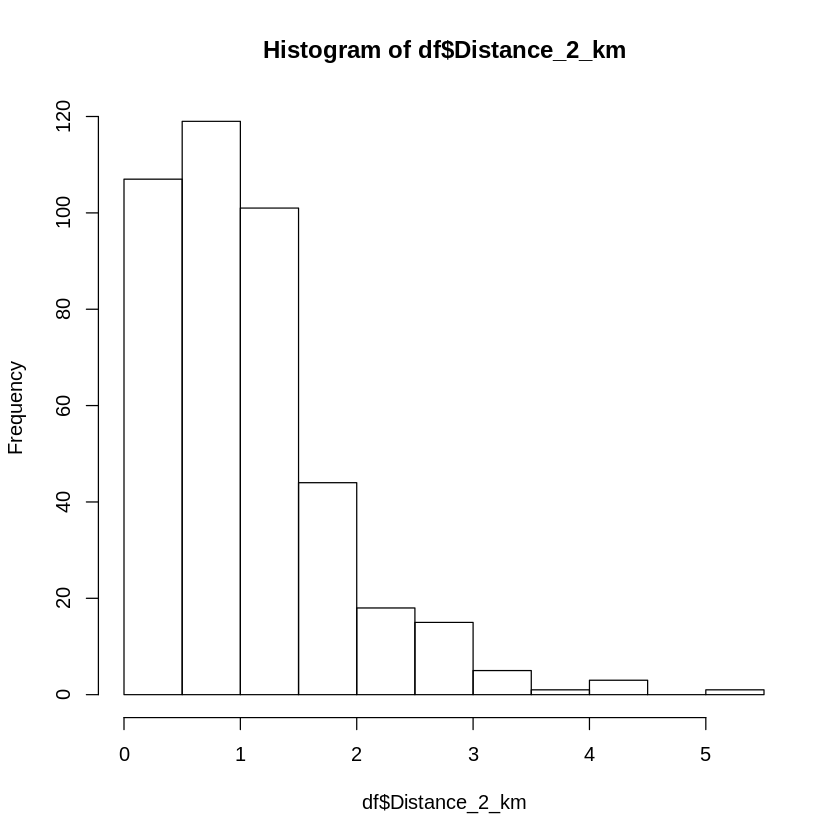